In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv('height-weight.csv')

In [130]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height Scatter Plot')

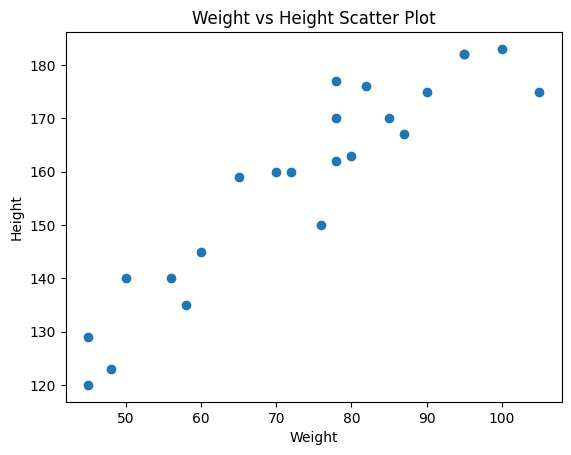

In [131]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
# plt.show()

In [132]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


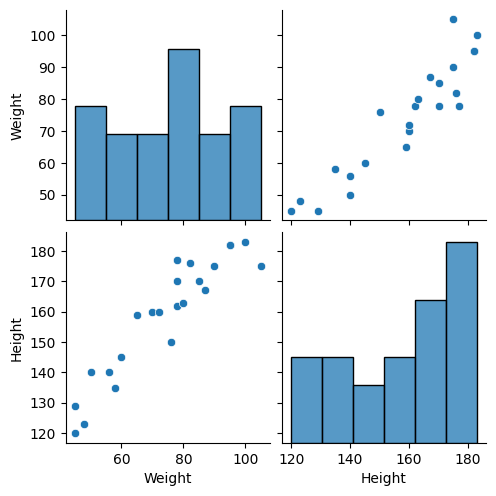

In [133]:
# seaborn for visulisation
import seaborn as sns
sns.pairplot(df)

In [134]:
# independent and dependent features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [135]:
# X_copy=df['Weight']
# type(X_copy)
X=df[['Weight']]  #independent features should be dataframe or 2d
np.array(X).shape
# type(X)


(23, 1)

In [136]:
X_series=df['Weight']
np.array(X).shape

(23, 1)

In [137]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [138]:
y=df['Height']#this can be in series or 1d array
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [139]:
np.array(y).shape

(23,)

In [140]:
#  Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
X_train.shape

(17, 1)

In [142]:
# standardization
from sklearn.preprocessing import StandardScaler


In [143]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [144]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [145]:
# applying simple linear regression
from sklearn.linear_model import LinearRegression

In [146]:
regression=LinearRegression(n_jobs=-1)

In [147]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [148]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


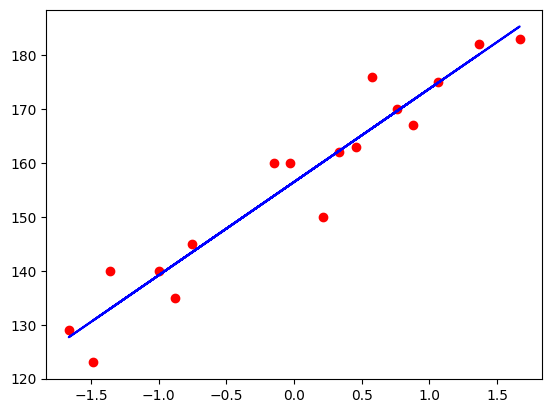

In [149]:
# plot training data plot best fit line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regression.predict(X_train), color='blue')


In [150]:
# prediction for test data
y_pred=regression.predict(X_test)

In [151]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [152]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Squared Error: 10.716374991212605


In [153]:
from sklearn.metrics import r2_score

In [154]:
score=r2_score(y_test, y_pred)
score

0.7360826717981276

In [155]:
# display adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [156]:
# ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()

In [157]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [158]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 30 Jul 2025   Prob (F-statistic):                       0.664
Time:                        06:31:59   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [159]:
# prediction for new data
regression.predict([[72]])

array([1401.94139895])

In [160]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])